### Import

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import re
import matplotlib.image as mpimg
import os
from collections import defaultdict
from PIL import Image
from itertools import product
from matplotlib.colors import LinearSegmentedColormap

# # Полностью отключить все предупреждения
# warnings.filterwarnings("ignore")

os.makedirs("ims", exist_ok=True)
# os.makedirs("ims/current", exist_ok=True)
os.makedirs("ims/averaged/all", exist_ok=True)
os.makedirs("ims/averaged/disorder", exist_ok=True)
os.makedirs("ims/averaged/final_en", exist_ok=True)


volume = 160 # для Si в A^3 --- рассчитываем все энергии на одну примитивную ячейку (вне зависимости от размеров суперячейки)

# In[116]:


plt.rcParams['font.family'] = 'serif'
import matplotlib
# matplotlib.use('Agg')
# print(matplotlib.get_backend())

### funcs

In [4]:
# def plot_nonlinear_response_v3(folder, ax):

#     # Загрузка данных, пропуская строки с комментариями (начинаются с #)
#     data = pd.read_csv(
#         folder + '/pulse_1e12_rt.data',
#         comment='#',
#         delim_whitespace=True,
#         header=None
#     )

#     # Назначим читаемые имена колонкам
#     data.columns = [
#         'time_fs',         # 1
#         'Ac_ext_x',        # 2
#         'Ac_ext_y',        # 3
#         'Ac_ext_z',        # 4
#         'E_ext_x',         # 5
#         'E_ext_y',         # 6
#         'E_ext_z',         # 7
#         'Ac_tot_x',        # 8
#         'Ac_tot_y',        # 9
#         'Ac_tot_z',        #10
#         'E_tot_x',         #11
#         'E_tot_y',         #12
#         'E_tot_z',         #13
#         'Jm_x',         #14
#         'Jm_y',         #15
#         'Jm_z',         #16
#     ]

#     t = data['time_fs']
#     Jm = data['Jm_'+ax]
#     El_f = data['E_ext_z']

#     # 1:Time[fs] 2:Ac_ext_x[fs*V/Angstrom] 3:Ac_ext_y[fs*V/Angstrom] 4:Ac_ext_z[fs*V/Angstrom]
#     #5:E_ext_x[V/Angstrom] 6:E_ext_y[V/Angstrom] 7:E_ext_z[V/Angstrom] 8:Ac_tot_x[fs*V/Angstrom]
#     # 9:Ac_tot_y[fs*V/Angstrom] 10:Ac_tot_z[fs*V/Angstrom] 11:E_tot_x[V/Angstrom]
#     # 12:E_tot_y[V/Angstrom] 13:E_tot_z[V/Angstrom]  14:Jm_x[1/fs*Angstrom^2] 15:Jm_y[1/fs*Angstrom^2] 16:Jm_z[1/fs*Angstrom^2]


#     # Построим графики
#     plt.figure(figsize=(10, 12.5))

#     # Общий заголовок для всей фигуры
#     plt.suptitle(' '.join(re.split('[/_]', folder)), fontsize=14)

#     # Первый график: внешнее поле по z
#     plt.subplot(5, 2, 1)
#     plt.plot(data['time_fs'], data['E_ext_z'], label='E_ext_z', color='#2CD311')
#     plt.xlabel('Time [fs]')
#     plt.ylabel('E [V/Å]')
#     plt.title('External electric field z')
#     plt.grid(True)
#     #plt.legend()




#     # Второй график: дипольный момент по z
#     plt.subplot(5, 2, 4)
#     plt.plot(data['time_fs'], data['Jm_'+ax], label='Dipole Moment z', color='magenta')
#     plt.xlabel('Time [fs]')
#     plt.ylabel('J [$fs^{-1} \\cdot Å^{-2}$]')
#     plt.title('Full matter current density')
#     plt.grid(True)
#     #plt.legend()

#     plt.tight_layout()

#     # Загрузка данных с указанием имен столбцов
#     energy_data = pd.read_csv(
#         folder + '/pulse_1e12_rt_energy.data',
#         comment='#',
#         delim_whitespace=True,
#         header=None,
#         names=['Time_fs', 'E_total_eV', 'Delta_E_eV']
#     )






#     product = El_f * Jm * volume
#     # Разность по времени
#     dt = np.diff(t, prepend=t[0])  # prepend чтобы сохранить размер
#     integral_cumulative = np.cumsum(product * dt)


#     # Построение графика изменения энергии во времени
#     plt.subplot(5, 2, 3)
#     # plt.plot(energy_data['Time_fs'], energy_data['Delta_E_eV'], label='ΔE = E_total - E_initial', color='r')
#     plt.plot(t, -integral_cumulative, label='ΔE = E_total - E_initial', color='r')
#     plt.xlabel('Time [fs]')
#     plt.ylabel('E [eV]')
#     plt.title('Full excitation energy per unit cell')
#     plt.grid(True)
#     #plt.legend()
#     plt.tight_layout()

#     del_E = energy_data['Delta_E_eV']

#     # Загрузка данных с указанием имен столбцов
#     data = pd.read_csv(
#         folder + '/pulse_1e12_pulse.data',
#         comment='#',
#         delim_whitespace=True,
#         header=None
#     )

#     # Назначим читаемые имена колонкам
#     data.columns = [
#         'energy_eV',           # 1
#         'Re_Jm_x',             # 2
#         'Re_Jm_y',             # 3
#         'Re_Jm_z',             # 4
#         'Im_Jm_x',             # 5
#         'Im_Jm_y',             # 6
#         'Im_Jm_z',             # 7
#         'Abs2_Jm_x',           # 8
#         'Abs2_Jm_y',           # 9
#         'Abs2_Jm_z',           #10
#         'Re_E_ext_x',          #11
#         'Re_E_ext_y',          #12
#         'Re_E_ext_z',          #13
#         'Im_E_ext_x',          #14
#         'Im_E_ext_y',          #15
#         'Im_E_ext_z',          #16
#         'Abs2_E_ext_x',        #17
#         'Abs2_E_ext_y',        #18
#         'Abs2_E_ext_z',        #19
#         'Re_E_tot_x',          #20
#         'Re_E_tot_y',          #21
#         'Re_E_tot_z',          #22
#         'Im_E_tot_x',          #23
#         'Im_E_tot_y',          #24
#         'Im_E_tot_z',          #25
#         'Abs2_E_tot_x',        #26
#         'Abs2_E_tot_y',        #27
#         'Abs2_E_tot_z',        #28
#     ]

#     Jw2 = data['Abs2_Jm_'+ax]
#     energy = data['energy_eV']
#     # Построение графика для 1 и 10 колонки
#     plt.subplot(5, 2, 2)
#     plt.plot(data['energy_eV'], data['Abs2_Jm_'+ax], label='', color='c')
#     plt.xlabel('Energy [eV]')
#     plt.ylabel('|J($\\omega)|^2 [Å^{-4}]$')
#     plt.yscale('log')
#     plt.title('Power spectrum')
#     plt.grid(True)
#     #plt.legend()
#     plt.tight_layout()

#         # Загрузка данных, пропуская строки с комментариями (начинаются с #)
#     data = pd.read_csv(
#         folder + '/pulse_1e6_rt.data',
#         comment='#',
#         delim_whitespace=True,
#         header=None
#     )

#     # Назначим читаемые имена колонкам
#     data.columns = [
#         'time_fs',         # 1
#         'Ac_ext_x',        # 2
#         'Ac_ext_y',        # 3
#         'Ac_ext_z',        # 4
#         'E_ext_x',         # 5
#         'E_ext_y',         # 6
#         'E_ext_z',         # 7
#         'Ac_tot_x',        # 8
#         'Ac_tot_y',        # 9
#         'Ac_tot_z',        #10
#         'E_tot_x',         #11
#         'E_tot_y',         #12
#         'E_tot_z',         #13
#         'Jm_x',         #14
#         'Jm_y',         #15
#         'Jm_z',         #16
#     ]

#     J_nonl = Jm - 10**3*data['Jm_'+ax]

#     plt.subplot(5, 2, 6)
#     plt.plot(data['time_fs'], Jm - 10**3*data['Jm_'+ax], label='', color='black')
#     plt.xlabel('Time [fs]')
#     plt.ylabel('J [$fs^{-1} \\cdot Å^{-2}$]')
#     plt.title('Nonlinear matter current density')
#     plt.grid(True)




#     product = El_f * (10**3*data['Jm_'+ax]) * volume
#     # Разность по времени
#     dt = np.diff(t, prepend=t[0])  # prepend чтобы сохранить размер
#     integral_cumulative = np.cumsum(product * dt)



#     # Построение графика изменения энергии во времени
#     plt.subplot(5, 2, 7)
#     plt.plot(t, -integral_cumulative, label='ΔE = E_total - E_initial', color='#DC143C')
#     plt.xlabel('Time [fs]')
#     plt.ylabel('E [eV]')
#     plt.title('Linear excitation energy per unit cell')
#     plt.grid(True)
#     #plt.legend()
#     plt.tight_layout()



#     plt.subplot(5, 2, 8)
#     plt.plot(data['time_fs'], 10**3*data['Jm_'+ax], label='', color='#00FF7F')
#     plt.xlabel('Time [fs]')
#     plt.ylabel('J [$fs^{-1} \\cdot Å^{-2}$]')
#     plt.title('Linear matter current density')
#     plt.grid(True)
#     plt.tight_layout()


#     # Загрузка данных с указанием имен столбцов
#     energy_data = pd.read_csv(
#         folder + '/pulse_1e6_rt_energy.data',
#         comment='#',
#         delim_whitespace=True,
#         header=None,
#         names=['Time_fs', 'E_total_eV', 'Delta_E_eV']
#     )



#     product = El_f * J_nonl * volume
#     # Разность по времени
#     dt = np.diff(t, prepend=t[0])  # prepend чтобы сохранить размер
#     integral_cumulative = np.cumsum(product * dt)


#     # Построение графика изменения энергии во времени
#     plt.subplot(5, 2, 5)
#     plt.plot(t, -integral_cumulative, label='ΔE = E_total - E_initial', color='blue')
#     plt.xlabel('Time [fs]')
#     plt.ylabel('E [eV]')
#     plt.title('Nonlinear excitation energy per unit cell')
#     plt.grid(True)
#     #plt.legend()
#     plt.tight_layout()




#     lr_data = pd.read_csv(
#         folder + '/lr_response.data',
#         comment='#',
#         delim_whitespace=True,
#         header=None
#     )

#     lr_data.columns = [
#         'Energy',        # 1
#         'Re_sigma_x',    # 2
#         'Re_sigma_y',    # 3
#         'Re_sigma_z',    # 4
#         'Im_sigma_x',    # 5
#         'Im_sigma_y',    # 6
#         'Im_sigma_z',    # 7
#         'Re_eps_x',      # 8
#         'Re_eps_y',      # 9
#         'Re_eps_z',      # 10
#         'Im_eps_x',      # 11
#         'Im_eps_y',      # 12
#         'Im_eps_z',      # 13
#     ]


#     # Построение графика изменения энергии во времени
#     plt.subplot(5, 2, 9)
#     plt.plot(lr_data['Energy'][100:], lr_data['Im_eps_z'][100:], label='Im(ε)', color='#00BFFF')
#     plt.xlabel('E [eV]')
#     plt.ylabel('Im(ε)')
#     plt.title('Absorption')
#     plt.grid(True)
#     #plt.legend()
#     plt.tight_layout()

#     # Построение графика изменения энергии во времени
#     plt.subplot(5, 2, 10)
#     plt.plot(lr_data['Energy'][100:], lr_data['Re_eps_z'][100:], label='Re(ε)', color='#FF007F')
#     plt.xlabel('E [eV]')
#     plt.ylabel('Re(ε)')
#     plt.title('Dispersion')
#     plt.grid(True)
#     #plt.legend()
#     plt.tight_layout()
#     # plt.show()

#     # plt.savefig("ims/all/" + folder + ".pdf")
#     plt.savefig("ims/all/" + folder + ".png", dpi=200)

In [5]:
def extract_c_num(s):
    start = s.index('c') + 1
    end = s.index('_', start)
    return int(s[start:end])

def extract_s_num(s):
    start = s.index('_s') + 2
    end = s.index('_', start)
    return float(s[start:end])

def extract_k_num(s):
    start = s.index('_k') + 2
    end = s.index('_', start)
    return int(s[start:end])

def extract_a_num(s):
    start = s.index('_a') + 2
    end = s.index('_', start)
    return float(s[start:end])

def extract_r_num(s):
    start = s.index('_r') + 2
    end = s.index('_', start)
    return float(s[start:end])

### func averaging

In [10]:
def plot_nonlinear_response_v4_averaging(folders, ax):


    
    for idx, folder in enumerate(folders):
    
        # Загрузка данных, пропуская строки с комментариями (начинаются с #)
        data = pd.read_csv(
            folder + '/pulse_1e12_rt.data',
            comment='#',
            delim_whitespace=True,
            header=None
        )
    
        # Назначим читаемые имена колонкам
        data.columns = [
            'time_fs',         # 1
            'Ac_ext_x',        # 2
            'Ac_ext_y',        # 3
            'Ac_ext_z',        # 4
            'E_ext_x',         # 5
            'E_ext_y',         # 6
            'E_ext_z',         # 7
            'Ac_tot_x',        # 8
            'Ac_tot_y',        # 9
            'Ac_tot_z',        #10
            'E_tot_x',         #11
            'E_tot_y',         #12
            'E_tot_z',         #13
            'Jm_x',         #14
            'Jm_y',         #15
            'Jm_z',         #16
        ]
    
        t = data['time_fs']
        Jm = data['Jm_'+ax]
        El_f = data['E_ext_z']

        if idx==0:
            Jm_av = Jm-Jm

        Jm_av = Jm_av + Jm
        
    
        # 1:Time[fs] 2:Ac_ext_x[fs*V/Angstrom] 3:Ac_ext_y[fs*V/Angstrom] 4:Ac_ext_z[fs*V/Angstrom]
        #5:E_ext_x[V/Angstrom] 6:E_ext_y[V/Angstrom] 7:E_ext_z[V/Angstrom] 8:Ac_tot_x[fs*V/Angstrom]
        # 9:Ac_tot_y[fs*V/Angstrom] 10:Ac_tot_z[fs*V/Angstrom] 11:E_tot_x[V/Angstrom]
        # 12:E_tot_y[V/Angstrom] 13:E_tot_z[V/Angstrom]  14:Jm_x[1/fs*Angstrom^2] 15:Jm_y[1/fs*Angstrom^2] 16:Jm_z[1/fs*Angstrom^2]
    
    Jm_av = Jm_av/len(folders)



    
    # Построим графики
    plt.figure(figsize=(10, 10))
    
        
    # Общий заголовок для всей фигуры
    plt.suptitle(' '.join(re.split('[/_]', folders[0]))+' averaged over '+ str(len(folders)) +' calc.', fontsize=14, y=0.99)
    
    
    # Первый график: внешнее поле по z
    plt.subplot(4, 2, 1)
    plt.plot(t, El_f, label='E_ext_z', color='#2CD311')
    plt.xlabel('Time [fs]')
    plt.ylabel('E [V/Å]')
    plt.title('External electric field z')
    plt.grid(True)
    #plt.legend()
    
    
    # Второй график: дипольный момент по z
    plt.subplot(4, 2, 4)
    plt.plot(t, Jm_av, label='Dipole Moment z', color='magenta')
    plt.xlabel('Time [fs]')
    plt.ylabel('J [$fs^{-1} \\cdot Å^{-2}$]')
    plt.title('Full matter current density')
    plt.grid(True)
    #plt.legend()
    
    plt.tight_layout()





    

        
    # # Загрузка данных с указанием имен столбцов
    # energy_data = pd.read_csv(
    #     folder + '/pulse_1e12_rt_energy.data',
    #     comment='#',
    #     delim_whitespace=True,
    #     header=None,
    #     names=['Time_fs', 'E_total_eV', 'Delta_E_eV']
    # )

    product = El_f * Jm_av * volume
    # Разность по времени
    dt = np.diff(t, prepend=t[0])  # prepend чтобы сохранить размер
    integral_cumulative = np.cumsum(product * dt)


    # Построение графика изменения энергии во времени
    plt.subplot(4, 2, 3)
    # plt.plot(energy_data['Time_fs'], energy_data['Delta_E_eV'], label='ΔE = E_total - E_initial', color='r')
    plt.plot(t, -integral_cumulative, label='ΔE = E_total - E_initial', color='r')
    plt.xlabel('Time [fs]')
    plt.ylabel('E [eV]')
    plt.title('Full excitation energy per unit cell')
    plt.grid(True)
    #plt.legend()
    plt.tight_layout()

    # del_E = energy_data['Delta_E_eV']



    
    for idx, folder in enumerate(folders):
    
    
        # Загрузка данных с указанием имен столбцов
        data = pd.read_csv(
            folder + '/pulse_1e12_pulse.data',
            comment='#',
            delim_whitespace=True,
            header=None
        )
    
        # Назначим читаемые имена колонкам
        data.columns = [
            'energy_eV',           # 1
            'Re_Jm_x',             # 2
            'Re_Jm_y',             # 3
            'Re_Jm_z',             # 4
            'Im_Jm_x',             # 5
            'Im_Jm_y',             # 6
            'Im_Jm_z',             # 7
            'Abs2_Jm_x',           # 8
            'Abs2_Jm_y',           # 9
            'Abs2_Jm_z',           #10
            'Re_E_ext_x',          #11
            'Re_E_ext_y',          #12
            'Re_E_ext_z',          #13
            'Im_E_ext_x',          #14
            'Im_E_ext_y',          #15
            'Im_E_ext_z',          #16
            'Abs2_E_ext_x',        #17
            'Abs2_E_ext_y',        #18
            'Abs2_E_ext_z',        #19
            'Re_E_tot_x',          #20
            'Re_E_tot_y',          #21
            'Re_E_tot_z',          #22
            'Im_E_tot_x',          #23
            'Im_E_tot_y',          #24
            'Im_E_tot_z',          #25
            'Abs2_E_tot_x',        #26
            'Abs2_E_tot_y',        #27
            'Abs2_E_tot_z',        #28
        ]
    
        Jw2 = data['Abs2_Jm_'+ax]

        if idx==0:
            Jw2_av = Jw2-Jw2

        Jw2_av = Jw2_av + Jw2
        
        energy = data['energy_eV']

        

    Jw2_av = Jw2_av/len(folders)

    # Построение графика для 1 и 10 колонки
    plt.subplot(4, 2, 2)
    plt.plot(energy, Jw2_av, label='', color='c')
    plt.xlabel('Energy [eV]')
    plt.ylabel('|J($\\omega)|^2 [Å^{-4}]$')
    plt.yscale('log')
    plt.title('Power spectrum')
    plt.grid(True)
    #plt.legend()
    plt.tight_layout()






    for idx, folder in enumerate(folders):


            # Загрузка данных, пропуская строки с комментариями (начинаются с #)
        data = pd.read_csv(
            folder + '/pulse_1e6_rt.data',
            comment='#',
            delim_whitespace=True,
            header=None
        )
    
        # Назначим читаемые имена колонкам
        data.columns = [
            'time_fs',         # 1
            'Ac_ext_x',        # 2
            'Ac_ext_y',        # 3
            'Ac_ext_z',        # 4
            'E_ext_x',         # 5
            'E_ext_y',         # 6
            'E_ext_z',         # 7
            'Ac_tot_x',        # 8
            'Ac_tot_y',        # 9
            'Ac_tot_z',        #10
            'E_tot_x',         #11
            'E_tot_y',         #12
            'E_tot_z',         #13
            'Jm_x',         #14
            'Jm_y',         #15
            'Jm_z',         #16
        ]


        Jm_weak = data['Jm_'+ax]

        if idx==0:
            Jm_weak_av = Jm_weak-Jm_weak

        Jm_weak_av = Jm_weak_av + Jm_weak



    Jm_weak_av = Jm_weak_av/len(folders) 


    J_nonl_av = Jm_av - 10**3*Jm_weak_av

    plt.subplot(4, 2, 6)
    plt.plot(t, J_nonl_av, label='', color='black')
    plt.xlabel('Time [fs]')
    plt.ylabel('J [$fs^{-1} \\cdot Å^{-2}$]')
    plt.title('Nonlinear matter current density')
    plt.grid(True)
    plt.tight_layout()



    
    
    
    product = El_f * (10**3*Jm_weak_av) * volume
    # Разность по времени
    dt = np.diff(t, prepend=t[0])  # prepend чтобы сохранить размер
    integral_cumulative = np.cumsum(product * dt)



    # Построение графика изменения энергии во времени
    plt.subplot(4, 2, 7)
    plt.plot(t, -integral_cumulative, label='ΔE = E_total - E_initial', color='#DC143C')
    plt.xlabel('Time [fs]')
    plt.ylabel('E [eV]')
    plt.title('Linear excitation energy per unit cell')
    plt.grid(True)
    #plt.legend()
    plt.tight_layout()


    
    
    plt.subplot(4, 2, 8)
    plt.plot(t, 10**3*Jm_weak_av, label='', color='#00FF7F')
    plt.xlabel('Time [fs]')
    plt.ylabel('J [$fs^{-1} \\cdot Å^{-2}$]')
    plt.title('Linear matter current density')
    plt.grid(True)
    plt.tight_layout()




    
        # # Загрузка данных с указанием имен столбцов
        # energy_data = pd.read_csv(
        #     folder + '/pulse_1e6_rt_energy.data',
        #     comment='#',
        #     delim_whitespace=True,
        #     header=None,
        #     names=['Time_fs', 'E_total_eV', 'Delta_E_eV']
        # )
    
    
    
    product = El_f * J_nonl_av * volume
    # Разность по времени
    dt = np.diff(t, prepend=t[0])  # prepend чтобы сохранить размер
    integral_cumulative = np.cumsum(product * dt)


    # Построение графика изменения энергии во времени
    plt.subplot(4, 2, 5)
    plt.plot(t, -integral_cumulative, label='ΔE = E_total - E_initial', color='blue')
    plt.xlabel('Time [fs]')
    plt.ylabel('E [eV]')
    plt.title('Nonlinear excitation energy per unit cell')
    plt.grid(True)
    #plt.legend()
    plt.tight_layout()
    






    # for idx, folder in enumerate(folders):

    
    #     lr_data = pd.read_csv(
    #         folder + '/lr_response.data',
    #         comment='#',
    #         delim_whitespace=True,
    #         header=None
    #     )
    
    #     lr_data.columns = [
    #         'Energy',        # 1
    #         'Re_sigma_x',    # 2
    #         'Re_sigma_y',    # 3
    #         'Re_sigma_z',    # 4
    #         'Im_sigma_x',    # 5
    #         'Im_sigma_y',    # 6
    #         'Im_sigma_z',    # 7
    #         'Re_eps_x',      # 8
    #         'Re_eps_y',      # 9
    #         'Re_eps_z',      # 10
    #         'Im_eps_x',      # 11
    #         'Im_eps_y',      # 12
    #         'Im_eps_z',      # 13
    #     ]
    

    #     Energy = lr_data['Energy'][100:]
        
    #     Im_eps = lr_data['Im_eps_z'][100:]
    #     Re_eps = lr_data['Re_eps_z'][100:]

    #     if idx==0:
    #         Im_eps_av = Im_eps-Im_eps
    #         Re_eps_av = Re_eps-Re_eps


    #     Im_eps_av = Im_eps_av + Im_eps
    #     Re_eps_av = Re_eps_av + Re_eps



    # Im_eps_av = Im_eps_av/len(folders)
    # Re_eps_av = Re_eps_av/len(folders)

        
    # # Построение графика изменения энергии во времени
    # plt.subplot(5, 2, 9)
    # plt.plot(Energy, lr_data['Im_eps_z'][100:], label='Im(ε)', color='#00BFFF')
    # plt.xlabel('E [eV]')
    # plt.ylabel('Im(ε)')
    # plt.title('Absorption')
    # plt.grid(True)
    # #plt.legend()
    # plt.tight_layout()

    # # Построение графика изменения энергии во времени
    # plt.subplot(5, 2, 10)
    # plt.plot(Energy, lr_data['Re_eps_z'][100:], label='Re(ε)', color='#FF007F')
    # plt.xlabel('E [eV]')
    # plt.ylabel('Re(ε)')
    # plt.title('Dispersion')
    # plt.grid(True)
    # #plt.legend()
    # plt.tight_layout()
    # plt.show()

    # plt.savefig("ims/all/" + folder + ".pdf")
    plt.savefig("ims/averaged/all/" + folder + '_averaged' + ".png", dpi=200)

### func averaging + range of disorders

In [11]:
def colors(color1, color2, steps):
    cmap = LinearSegmentedColormap.from_list("custom_gradient", [color1, color2])
    return [cmap(i / (steps - 1)) for i in range(steps)]

In [23]:
def plot_nonlinear_response_v5_averaging_disorder(folders_dict, ax):
    

    keys = sorted(list(folders_dict.keys()))

    str1 = re.sub(r's[^_]+_', '', folders_dict[keys[0]][0])
    
    # Построим графики
    plt.figure(figsize=(10, 10))    
    # Общий заголовок для всей фигуры
    plt.suptitle(' '.join(re.split('[/_]', str1))+' averaged over '+ str(len(folders_dict[keys[-1]])) +' calc.', fontsize=14, y=0.99)


    leg_size = 8
    alpha0 = 0.75
    num_keys = len(keys)

    # colors2 = colors('c', 'r', num_keys)
    
    # colors3 = colors('r', 'magenta', num_keys)
    # colors4 = colors('magenta', 'r', num_keys)
    
    # colors5 = colors('blue', 'black', num_keys)
    # colors6 = colors('black', 'blue', num_keys)
    
    # colors7 = colors('#DC143C', '#00FF7F', num_keys)
    # colors8 = colors('#00FF7F', '#DC143C', num_keys)
    
    # colors9 = colors('#00BFFF', '#FF007F', num_keys)
    # colors10 = colors('#FF007F', '#00BFFF', num_keys)

    colors2 = colors('b', 'r', num_keys)
    
    colors3 = colors('b', 'r', num_keys)
    colors4 = colors('b', 'r', num_keys)
    
    colors5 = colors('b', 'r', num_keys)
    colors6 = colors('b', 'r', num_keys)
    
    colors7 = colors('b', 'r', num_keys)
    colors8 = colors('b', 'r', num_keys)
    
    colors9 = colors('b', 'r', num_keys)
    colors10 = colors('b', 'r', num_keys)
    

    for j, key in enumerate(keys):

        folders = folders_dict[key]
        
        for idx, folder in enumerate(folders):
        
            # Загрузка данных, пропуская строки с комментариями (начинаются с #)
            data = pd.read_csv(
                folder + '/pulse_1e12_rt.data',
                comment='#',
                delim_whitespace=True,
                header=None
            )
        
            # Назначим читаемые имена колонкам
            data.columns = [
                'time_fs',         # 1
                'Ac_ext_x',        # 2
                'Ac_ext_y',        # 3
                'Ac_ext_z',        # 4
                'E_ext_x',         # 5
                'E_ext_y',         # 6
                'E_ext_z',         # 7
                'Ac_tot_x',        # 8
                'Ac_tot_y',        # 9
                'Ac_tot_z',        #10
                'E_tot_x',         #11
                'E_tot_y',         #12
                'E_tot_z',         #13
                'Jm_x',         #14
                'Jm_y',         #15
                'Jm_z',         #16
            ]
        
            t = data['time_fs']
            Jm = data['Jm_'+ax]
            El_f = data['E_ext_z']
    
            if idx==0:
                Jm_av = Jm-Jm
    
            Jm_av = Jm_av + Jm
            
        
            # 1:Time[fs] 2:Ac_ext_x[fs*V/Angstrom] 3:Ac_ext_y[fs*V/Angstrom] 4:Ac_ext_z[fs*V/Angstrom]
            #5:E_ext_x[V/Angstrom] 6:E_ext_y[V/Angstrom] 7:E_ext_z[V/Angstrom] 8:Ac_tot_x[fs*V/Angstrom]
            # 9:Ac_tot_y[fs*V/Angstrom] 10:Ac_tot_z[fs*V/Angstrom] 11:E_tot_x[V/Angstrom]
            # 12:E_tot_y[V/Angstrom] 13:E_tot_z[V/Angstrom]  14:Jm_x[1/fs*Angstrom^2] 15:Jm_y[1/fs*Angstrom^2] 16:Jm_z[1/fs*Angstrom^2]
        
        Jm_av = Jm_av/len(folders)
    
            
        
        # Первый график: внешнее поле по z
        plt.subplot(4, 2, 1)
        plt.plot(t, El_f, label='E_ext_z', color='#2CD311')
        # plt.plot(t, El_f, label='E_ext_z', color='black', alpha=alpha0)
        plt.xlabel('Time [fs]')
        plt.ylabel('E [V/Å]')
        plt.title('External electric field z')
        plt.grid(True)
        # plt.legend()
        
        
        # Второй график: дипольный момент по z
        plt.subplot(4, 2, 4)
        plt.plot(t, Jm_av, label='σ = '+str(key), color=colors4[j], alpha=alpha0)
        plt.xlabel('Time [fs]')
        plt.ylabel('J [$fs^{-1} \\cdot Å^{-2}$]')
        plt.title('Full matter current density')
        plt.grid(True)
        plt.legend(loc='lower right', fontsize=leg_size)
        plt.tight_layout()
    
    
    
    
    
        
    
            
        # # Загрузка данных с указанием имен столбцов
        # energy_data = pd.read_csv(
        #     folder + '/pulse_1e12_rt_energy.data',
        #     comment='#',
        #     delim_whitespace=True,
        #     header=None,
        #     names=['Time_fs', 'E_total_eV', 'Delta_E_eV']
        # )
    
        product = El_f * Jm_av * volume
        # Разность по времени
        dt = np.diff(t, prepend=t[0])  # prepend чтобы сохранить размер
        integral_cumulative = np.cumsum(product * dt)
    
    
        # Построение графика изменения энергии во времени
        plt.subplot(4, 2, 3)
        # plt.plot(energy_data['Time_fs'], energy_data['Delta_E_eV'], label='ΔE = E_total - E_initial', color='r')
        plt.plot(t, -integral_cumulative, label='σ = '+str(key), color=colors3[j], alpha=alpha0)
        plt.xlabel('Time [fs]')
        plt.ylabel('E [eV]')
        plt.title('Full excitation energy per unit cell')
        plt.grid(True)
        plt.legend(loc='upper left', fontsize=leg_size)
        plt.tight_layout()
    
        # del_E = energy_data['Delta_E_eV']
    
    
    
        
        for idx, folder in enumerate(folders):
        
        
            # Загрузка данных с указанием имен столбцов
            data = pd.read_csv(
                folder + '/pulse_1e12_pulse.data',
                comment='#',
                delim_whitespace=True,
                header=None
            )
        
            # Назначим читаемые имена колонкам
            data.columns = [
                'energy_eV',           # 1
                'Re_Jm_x',             # 2
                'Re_Jm_y',             # 3
                'Re_Jm_z',             # 4
                'Im_Jm_x',             # 5
                'Im_Jm_y',             # 6
                'Im_Jm_z',             # 7
                'Abs2_Jm_x',           # 8
                'Abs2_Jm_y',           # 9
                'Abs2_Jm_z',           #10
                'Re_E_ext_x',          #11
                'Re_E_ext_y',          #12
                'Re_E_ext_z',          #13
                'Im_E_ext_x',          #14
                'Im_E_ext_y',          #15
                'Im_E_ext_z',          #16
                'Abs2_E_ext_x',        #17
                'Abs2_E_ext_y',        #18
                'Abs2_E_ext_z',        #19
                'Re_E_tot_x',          #20
                'Re_E_tot_y',          #21
                'Re_E_tot_z',          #22
                'Im_E_tot_x',          #23
                'Im_E_tot_y',          #24
                'Im_E_tot_z',          #25
                'Abs2_E_tot_x',        #26
                'Abs2_E_tot_y',        #27
                'Abs2_E_tot_z',        #28
            ]
        
            Jw2 = data['Abs2_Jm_'+ax]
    
            if idx==0:
                Jw2_av = Jw2-Jw2
    
            Jw2_av = Jw2_av + Jw2
            
            energy = data['energy_eV']
    
            
    
        Jw2_av = Jw2_av/len(folders)
    
        # Построение графика для 1 и 10 колонки
        plt.subplot(4, 2, 2)
        plt.plot(energy, Jw2_av, label='σ = '+str(key), color=colors2[j], alpha=alpha0)
        plt.xlabel('Energy [eV]')
        plt.ylabel('|J($\\omega)|^2 [Å^{-4}]$')
        plt.yscale('log')
        plt.title('Power spectrum')
        plt.grid(True)
        plt.legend(loc='upper right', fontsize=leg_size)
        plt.tight_layout()
    
    
    
    
    
    
        for idx, folder in enumerate(folders):
    
    
                # Загрузка данных, пропуская строки с комментариями (начинаются с #)
            data = pd.read_csv(
                folder + '/pulse_1e6_rt.data',
                comment='#',
                delim_whitespace=True,
                header=None
            )
        
            # Назначим читаемые имена колонкам
            data.columns = [
                'time_fs',         # 1
                'Ac_ext_x',        # 2
                'Ac_ext_y',        # 3
                'Ac_ext_z',        # 4
                'E_ext_x',         # 5
                'E_ext_y',         # 6
                'E_ext_z',         # 7
                'Ac_tot_x',        # 8
                'Ac_tot_y',        # 9
                'Ac_tot_z',        #10
                'E_tot_x',         #11
                'E_tot_y',         #12
                'E_tot_z',         #13
                'Jm_x',         #14
                'Jm_y',         #15
                'Jm_z',         #16
            ]
    
    
            Jm_weak = data['Jm_'+ax]
    
            if idx==0:
                Jm_weak_av = Jm_weak-Jm_weak
    
            Jm_weak_av = Jm_weak_av + Jm_weak
    
    
    
        Jm_weak_av = Jm_weak_av/len(folders) 
    
    
        J_nonl_av = Jm_av - 10**3*Jm_weak_av
    
        plt.subplot(4, 2, 6)
        plt.plot(t, J_nonl_av, label='σ = '+str(key), color=colors6[j], alpha=alpha0)
        plt.xlabel('Time [fs]')
        plt.ylabel('J [$fs^{-1} \\cdot Å^{-2}$]')
        plt.title('Nonlinear matter current density')
        plt.legend(loc='lower right', fontsize=leg_size)
        plt.grid(True)
    
    
    
        
        
        
        product = El_f * (10**3*Jm_weak_av) * volume
        # Разность по времени
        dt = np.diff(t, prepend=t[0])  # prepend чтобы сохранить размер
        integral_cumulative = np.cumsum(product * dt)
    
    
    
        # Построение графика изменения энергии во времени
        plt.subplot(4, 2, 7)
        plt.plot(t, -integral_cumulative, label='σ = '+str(key), color=colors7[j], alpha=alpha0)
        plt.xlabel('Time [fs]')
        plt.ylabel('E [eV]')
        plt.title('Linear excitation energy per unit cell')
        plt.grid(True)
        plt.legend(loc='upper left', fontsize=leg_size)
        plt.tight_layout()
    
    
        
        
        plt.subplot(4, 2, 8)
        plt.plot(t, 10**3*Jm_weak_av, label='σ = '+str(key), color=colors8[j], alpha=alpha0)
        plt.xlabel('Time [fs]')
        plt.ylabel('J [$fs^{-1} \\cdot Å^{-2}$]')
        plt.title('Linear matter current density')
        plt.grid(True)
        plt.legend(loc='lower right', fontsize=leg_size)
        plt.tight_layout()
    
    
    
    
        
            # # Загрузка данных с указанием имен столбцов
            # energy_data = pd.read_csv(
            #     folder + '/pulse_1e6_rt_energy.data',
            #     comment='#',
            #     delim_whitespace=True,
            #     header=None,
            #     names=['Time_fs', 'E_total_eV', 'Delta_E_eV']
            # )
        
        
        
        product = El_f * J_nonl_av * volume
        # Разность по времени
        dt = np.diff(t, prepend=t[0])  # prepend чтобы сохранить размер
        integral_cumulative = np.cumsum(product * dt)
    
    
        # Построение графика изменения энергии во времени
        plt.subplot(4, 2, 5)
        plt.plot(t, -integral_cumulative, label='σ = '+str(key), color=colors5[j], alpha=alpha0)
        plt.xlabel('Time [fs]')
        plt.ylabel('E [eV]')
        plt.title('Nonlinear excitation energy per unit cell')
        plt.grid(True)
        plt.legend(loc='upper left', fontsize=leg_size)
        plt.tight_layout()
        
    
    
    
    
    
    
        # for idx, folder in enumerate(folders):
    
        
        #     lr_data = pd.read_csv(
        #         folder + '/lr_response.data',
        #         comment='#',
        #         delim_whitespace=True,
        #         header=None
        #     )
        
        #     lr_data.columns = [
        #         'Energy',        # 1
        #         'Re_sigma_x',    # 2
        #         'Re_sigma_y',    # 3
        #         'Re_sigma_z',    # 4
        #         'Im_sigma_x',    # 5
        #         'Im_sigma_y',    # 6
        #         'Im_sigma_z',    # 7
        #         'Re_eps_x',      # 8
        #         'Re_eps_y',      # 9
        #         'Re_eps_z',      # 10
        #         'Im_eps_x',      # 11
        #         'Im_eps_y',      # 12
        #         'Im_eps_z',      # 13
        #     ]
        
    
        #     Energy = lr_data['Energy'][100:]
            
        #     Im_eps = lr_data['Im_eps_z'][100:]
        #     Re_eps = lr_data['Re_eps_z'][100:]
    
        #     if idx==0:
        #         Im_eps_av = Im_eps-Im_eps
        #         Re_eps_av = Re_eps-Re_eps
    
    
        #     Im_eps_av = Im_eps_av + Im_eps
        #     Re_eps_av = Re_eps_av + Re_eps
    
    
    
        # Im_eps_av = Im_eps_av/len(folders)
        # Re_eps_av = Re_eps_av/len(folders)
    
            
        # # Построение графика изменения энергии во времени
        # plt.subplot(5, 2, 9)
        # plt.plot(Energy, lr_data['Im_eps_z'][100:], label='σ = '+str(key), color=colors9[j], alpha=alpha0)
        # plt.xlabel('E [eV]')
        # plt.ylabel('Im(ε)')
        # plt.title('Absorption')
        # plt.grid(True)
        # plt.legend(fontsize=leg_size)
        # plt.tight_layout()
    
        # # Построение графика изменения энергии во времени
        # plt.subplot(5, 2, 10)
        # plt.plot(Energy, lr_data['Re_eps_z'][100:], label='σ = '+str(key), color=colors10[j], alpha=alpha0)
        # plt.xlabel('E [eV]')
        # plt.ylabel('Re(ε)')
        # plt.title('Dispersion')
        # plt.grid(True)
        # plt.legend(fontsize=leg_size)
        # plt.tight_layout()
        # # plt.show()

        
    
        # plt.savefig("ims/all/" + folder + ".pdf")
        plt.savefig("ims/averaged/disorder/" + 'disorder_comparison' + ".png", dpi=200)

### func averaging final energies

In [13]:
def plot_nonlinear_response_v6_averaging_disorder_final_en(folders_dict, ax):
    

    keys = sorted(list(folders_dict.keys()))

    str1 = re.sub(r's[^_]+_', '', folders_dict[keys[0]][0])
    
    # Построим графики
    plt.figure(figsize=(10, 5))    
    # Общий заголовок для всей фигуры
    plt.suptitle(' '.join(re.split('[/_]', str1))+' averaged over '+ str(len(folders_dict[keys[0]])) +' calc.', fontsize=14, y=0.99)


    leg_size = 8
    alpha0 = 0.75
    num_keys = len(keys)



    colors2 = colors('b', 'r', num_keys)
    
    colors3 = colors('b', 'r', num_keys)
    colors4 = colors('b', 'r', num_keys)
    
    colors5 = colors('b', 'r', num_keys)
    colors6 = colors('b', 'r', num_keys)
    
    colors7 = colors('b', 'r', num_keys)
    colors8 = colors('b', 'r', num_keys)
    
    colors9 = colors('b', 'r', num_keys)
    colors10 = colors('b', 'r', num_keys)
    

    for j, key in enumerate(keys):

        folders = folders_dict[key]
        
        for idx, folder in enumerate(folders):
        
            # Загрузка данных, пропуская строки с комментариями (начинаются с #)
            data = pd.read_csv(
                folder + '/pulse_1e12_rt.data',
                comment='#',
                delim_whitespace=True,
                header=None
            )
        
            # Назначим читаемые имена колонкам
            data.columns = [
                'time_fs',         # 1
                'Ac_ext_x',        # 2
                'Ac_ext_y',        # 3
                'Ac_ext_z',        # 4
                'E_ext_x',         # 5
                'E_ext_y',         # 6
                'E_ext_z',         # 7
                'Ac_tot_x',        # 8
                'Ac_tot_y',        # 9
                'Ac_tot_z',        #10
                'E_tot_x',         #11
                'E_tot_y',         #12
                'E_tot_z',         #13
                'Jm_x',         #14
                'Jm_y',         #15
                'Jm_z',         #16
            ]
        
            t = data['time_fs']
            Jm = data['Jm_'+ax]
            El_f = data['E_ext_z']
    
            if idx==0:
                Jm_av = Jm-Jm
    
            Jm_av = Jm_av + Jm
            
        
            # 1:Time[fs] 2:Ac_ext_x[fs*V/Angstrom] 3:Ac_ext_y[fs*V/Angstrom] 4:Ac_ext_z[fs*V/Angstrom]
            #5:E_ext_x[V/Angstrom] 6:E_ext_y[V/Angstrom] 7:E_ext_z[V/Angstrom] 8:Ac_tot_x[fs*V/Angstrom]
            # 9:Ac_tot_y[fs*V/Angstrom] 10:Ac_tot_z[fs*V/Angstrom] 11:E_tot_x[V/Angstrom]
            # 12:E_tot_y[V/Angstrom] 13:E_tot_z[V/Angstrom]  14:Jm_x[1/fs*Angstrom^2] 15:Jm_y[1/fs*Angstrom^2] 16:Jm_z[1/fs*Angstrom^2]
        
        Jm_av = Jm_av/len(folders)
    

            
        # # Загрузка данных с указанием имен столбцов
        # energy_data = pd.read_csv(
        #     folder + '/pulse_1e12_rt_energy.data',
        #     comment='#',
        #     delim_whitespace=True,
        #     header=None,
        #     names=['Time_fs', 'E_total_eV', 'Delta_E_eV']
        # )
    
        product = El_f * Jm_av * volume
        # Разность по времени
        dt = np.diff(t, prepend=t[0])  # prepend чтобы сохранить размер
        integral_cumulative = np.cumsum(product * dt)
    
    
        # Построение графика изменения энергии во времени
        plt.subplot(2, 2, 1)
        # plt.plot(energy_data['Time_fs'], energy_data['Delta_E_eV'], label='ΔE = E_total - E_initial', color='r')
        plt.plot(t, -integral_cumulative, label='σ = '+str(key), color=colors3[j], alpha=alpha0)
        plt.xlabel('Time [fs]')
        plt.ylabel('E [eV]')
        plt.title('Full excitation energy per unit cell')
        plt.grid(True)
        plt.legend(loc='upper left', fontsize=leg_size)
        plt.tight_layout()
    
        # del_E = energy_data['Delta_E_eV']
    
    
    
        
        for idx, folder in enumerate(folders):
        
        
            # Загрузка данных с указанием имен столбцов
            data = pd.read_csv(
                folder + '/pulse_1e12_pulse.data',
                comment='#',
                delim_whitespace=True,
                header=None
            )
        
            # Назначим читаемые имена колонкам
            data.columns = [
                'energy_eV',           # 1
                'Re_Jm_x',             # 2
                'Re_Jm_y',             # 3
                'Re_Jm_z',             # 4
                'Im_Jm_x',             # 5
                'Im_Jm_y',             # 6
                'Im_Jm_z',             # 7
                'Abs2_Jm_x',           # 8
                'Abs2_Jm_y',           # 9
                'Abs2_Jm_z',           #10
                'Re_E_ext_x',          #11
                'Re_E_ext_y',          #12
                'Re_E_ext_z',          #13
                'Im_E_ext_x',          #14
                'Im_E_ext_y',          #15
                'Im_E_ext_z',          #16
                'Abs2_E_ext_x',        #17
                'Abs2_E_ext_y',        #18
                'Abs2_E_ext_z',        #19
                'Re_E_tot_x',          #20
                'Re_E_tot_y',          #21
                'Re_E_tot_z',          #22
                'Im_E_tot_x',          #23
                'Im_E_tot_y',          #24
                'Im_E_tot_z',          #25
                'Abs2_E_tot_x',        #26
                'Abs2_E_tot_y',        #27
                'Abs2_E_tot_z',        #28
            ]
        
            Jw2 = data['Abs2_Jm_'+ax]
    
            if idx==0:
                Jw2_av = Jw2-Jw2
    
            Jw2_av = Jw2_av + Jw2
            
            energy = data['energy_eV']
    
            
    
        Jw2_av = Jw2_av/len(folders)
    
        # Построение графика для 1 и 10 колонки
        plt.subplot(2, 2, 4)
        plt.plot(energy, Jw2_av, label='σ = '+str(key), color=colors2[j], alpha=alpha0)
        plt.xlabel('Energy [eV]')
        plt.ylabel('|J($\\omega)|^2 [Å^{-4}]$')
        plt.yscale('log')
        plt.title('Power spectrum')
        plt.grid(True)
        plt.legend(loc='upper right', fontsize=leg_size)
        plt.tight_layout()
    
    
    
    
    
    
        for idx, folder in enumerate(folders):
    
    
                # Загрузка данных, пропуская строки с комментариями (начинаются с #)
            data = pd.read_csv(
                folder + '/pulse_1e6_rt.data',
                comment='#',
                delim_whitespace=True,
                header=None
            )
        
            # Назначим читаемые имена колонкам
            data.columns = [
                'time_fs',         # 1
                'Ac_ext_x',        # 2
                'Ac_ext_y',        # 3
                'Ac_ext_z',        # 4
                'E_ext_x',         # 5
                'E_ext_y',         # 6
                'E_ext_z',         # 7
                'Ac_tot_x',        # 8
                'Ac_tot_y',        # 9
                'Ac_tot_z',        #10
                'E_tot_x',         #11
                'E_tot_y',         #12
                'E_tot_z',         #13
                'Jm_x',         #14
                'Jm_y',         #15
                'Jm_z',         #16
            ]
    
    
            Jm_weak = data['Jm_'+ax]
    
            if idx==0:
                Jm_weak_av = Jm_weak-Jm_weak
    
            Jm_weak_av = Jm_weak_av + Jm_weak
    
    
    
        Jm_weak_av = Jm_weak_av/len(folders) 
    
    
        J_nonl_av = Jm_av - 10**3*Jm_weak_av
    

            
        
        product = El_f * (10**3*Jm_weak_av) * volume
        # Разность по времени
        dt = np.diff(t, prepend=t[0])  # prepend чтобы сохранить размер
        integral_cumulative = np.cumsum(product * dt)
    
    
    
        # Построение графика изменения энергии во времени
        plt.subplot(2, 2, 2)
        plt.plot(t, -integral_cumulative, label='σ = '+str(key), color=colors7[j], alpha=alpha0)
        plt.xlabel('Time [fs]')
        plt.ylabel('E [eV]')
        plt.title('Linear excitation energy per unit cell')
        plt.grid(True)
        plt.legend(loc='upper left', fontsize=leg_size)
        plt.tight_layout()
    
        
    
        
            # # Загрузка данных с указанием имен столбцов
            # energy_data = pd.read_csv(
            #     folder + '/pulse_1e6_rt_energy.data',
            #     comment='#',
            #     delim_whitespace=True,
            #     header=None,
            #     names=['Time_fs', 'E_total_eV', 'Delta_E_eV']
            # )
        
        
        
        product = El_f * J_nonl_av * volume
        # Разность по времени
        dt = np.diff(t, prepend=t[0])  # prepend чтобы сохранить размер
        integral_cumulative = np.cumsum(product * dt)
    
    
        # Построение графика изменения энергии во времени
        plt.subplot(2, 2, 3)
        plt.plot(t, -integral_cumulative, label='σ = '+str(key), color=colors5[j], alpha=alpha0)
        plt.xlabel('Time [fs]')
        plt.ylabel('E [eV]')
        plt.title('Nonlinear excitation energy per unit cell')
        plt.grid(True)
        plt.legend(loc='upper left', fontsize=leg_size)
        plt.tight_layout()
        
    
    plt.savefig("ims/averaged/final_en/" + 'disorder_comparison' + ".png", dpi=200)

### v7

In [14]:
def plot_nonlinear_response_v7_averaging_disorder_final_en(folders_dict, ax):
    

    keys = sorted(list(folders_dict.keys()))

    str1 = re.sub(r's[^_]+_', '', folders_dict[keys[0]][0])
    
    # Построим графики
    plt.figure(figsize=(10, 5))    
    # Общий заголовок для всей фигуры
    plt.suptitle(' '.join(re.split('[/_]', str1))+' averaged over '+ str(len(folders_dict[keys[0]])) +' calc.', fontsize=14, y=0.99)


    leg_size = 8
    alpha0 = 0.75
    num_keys = len(keys)



    colors2 = colors('b', 'r', num_keys)
    
    colors3 = colors('b', 'r', num_keys)
    colors4 = colors('b', 'r', num_keys)
    
    colors5 = colors('b', 'r', num_keys)
    colors6 = colors('b', 'r', num_keys)
    
    colors7 = colors('b', 'r', num_keys)
    colors8 = colors('b', 'r', num_keys)
    
    colors9 = colors('b', 'r', num_keys)
    colors10 = colors('b', 'r', num_keys)
    

    

    full_en_arr = np.array([])
    full_en_errs = np.array([])
    full_en_mean_errs = np.array([])

    
    nonlin_en_arr = np.array([])
    nonlin_en_errs = np.array([])
    nonlin_en_mean_errs = np.array([])

    
    lin_en_arr = np.array([])
    lin_en_errs = np.array([])
    lin_en_mean_errs = np.array([])
    
    
    for j, key in enumerate(keys):

        folders = folders_dict[key]


        full_en_arr_part = np.array([])


        for idx, folder in enumerate(folders):
        
            # Загрузка данных, пропуская строки с комментариями (начинаются с #)
            data_rt = pd.read_csv(
                folder + '/pulse_1e12_rt.data',
                comment='#',
                delim_whitespace=True,
                header=None
            )
        
            # Назначим читаемые имена колонкам
            data_rt.columns = [
                'time_fs',         # 1
                'Ac_ext_x',        # 2
                'Ac_ext_y',        # 3
                'Ac_ext_z',        # 4
                'E_ext_x',         # 5
                'E_ext_y',         # 6
                'E_ext_z',         # 7
                'Ac_tot_x',        # 8
                'Ac_tot_y',        # 9
                'Ac_tot_z',        #10
                'E_tot_x',         #11
                'E_tot_y',         #12
                'E_tot_z',         #13
                'Jm_x',         #14
                'Jm_y',         #15
                'Jm_z',         #16
            ]

            
            t = data_rt['time_fs']
            Jm = data_rt['Jm_'+ax]
            El_f = data_rt['E_ext_z']


            
            if idx==0:
                Jm_av = Jm-Jm
    
            Jm_av = Jm_av + Jm

            
            product = El_f * Jm * volume
            # Разность по времени
            dt = np.diff(t, prepend=t[0])  # prepend чтобы сохранить размер
            integral_cumulative = np.cumsum(product * dt)


            
            full_en_arr_part = np.append(full_en_arr_part, -integral_cumulative[-1:])
            


        mean = np.mean(full_en_arr_part)
        std = np.std(full_en_arr_part, ddof=1)
        size = len(full_en_arr_part)
        
        full_en_arr = np.append(full_en_arr, mean)
        if size>1:
            full_en_errs = np.append(full_en_errs, std)
            full_en_mean_errs = np.append(full_en_mean_errs, std/np.sqrt(size))
        else:
            full_en_errs = np.append(full_en_errs, 0)
            full_en_mean_errs = np.append(full_en_mean_errs, 0)
        
        Jm_av = Jm_av/len(folders)
    

            
        # # Загрузка данных с указанием имен столбцов
        # energy_data = pd.read_csv(
        #     folder + '/pulse_1e12_rt_energy.data',
        #     comment='#',
        #     delim_whitespace=True,
        #     header=None,
        #     names=['Time_fs', 'E_total_eV', 'Delta_E_eV']
        # )
    
        product = El_f * Jm_av * volume
        # Разность по времени
        dt = np.diff(t, prepend=t[0])  # prepend чтобы сохранить размер
        integral_cumulative = np.cumsum(product * dt)
    
        
        # # Построение графика изменения энергии во времени
        # plt.subplot(2, 2, 1)
        # # plt.plot(energy_data['Time_fs'], energy_data['Delta_E_eV'], label='ΔE = E_total - E_initial', color='r')
        # plt.plot(t, -integral_cumulative, label='σ = '+str(key), color=colors3[j], alpha=alpha0)
        # plt.xlabel('Time [fs]')
        # plt.ylabel('E [eV]')
        # plt.title('Full excitation energy per unit cell')
        # plt.grid(True)
        # plt.legend(loc='upper left', fontsize=leg_size)
        # plt.tight_layout()
    
        # del_E = energy_data['Delta_E_eV']


        #потом вынести все из цикла по j!!!

        if j==len(keys)-1:
            plt.subplot(2, 2, 1)
            plt.errorbar(keys[:(j+1)], full_en_arr, yerr=full_en_errs, fmt='o', ecolor='r', label='std', linewidth = 3, markersize=4, color='black')
            plt.errorbar(keys[:(j+1)], full_en_arr, yerr=full_en_mean_errs, fmt='o', ecolor='b', label='mean std', linewidth = 3, markersize=4, color='black')
            plt.plot(keys[:(j+1)], full_en_arr, linestyle=(0, (15, 3)), linewidth = 1.1, color='black')
            plt.xlabel('Disorder [Å]')
            plt.ylabel('E [eV]')
            plt.title('Final full excitation energy averaged over # calc.')
            plt.grid(True)
            plt.legend(loc='upper left', fontsize=8)

















        
    
        for idx, folder in enumerate(folders):
    
    
                # Загрузка данных, пропуская строки с комментариями (начинаются с #)
            data_rt_weak = pd.read_csv(
                folder + '/pulse_1e6_rt.data',
                comment='#',
                delim_whitespace=True,
                header=None
            )
        
            # Назначим читаемые имена колонкам
            data_rt_weak.columns = [
                'time_fs',         # 1
                'Ac_ext_x',        # 2
                'Ac_ext_y',        # 3
                'Ac_ext_z',        # 4
                'E_ext_x',         # 5
                'E_ext_y',         # 6
                'E_ext_z',         # 7
                'Ac_tot_x',        # 8
                'Ac_tot_y',        # 9
                'Ac_tot_z',        #10
                'E_tot_x',         #11
                'E_tot_y',         #12
                'E_tot_z',         #13
                'Jm_x',         #14
                'Jm_y',         #15
                'Jm_z',         #16
            ]
    
    
            Jm_weak = data_rt_weak['Jm_'+ax]
    
            if idx==0:
                Jm_weak_av = Jm_weak-Jm_weak
    
            Jm_weak_av = Jm_weak_av + Jm_weak
    
    
    
        Jm_weak_av = Jm_weak_av/len(folders) 
    
    
        J_nonl_av = Jm_av - 10**3*Jm_weak_av
    

            
        
        product = El_f * (10**3*Jm_weak_av) * volume
        # Разность по времени
        dt = np.diff(t, prepend=t[0])  # prepend чтобы сохранить размер
        integral_cumulative = np.cumsum(product * dt)
    
    
    
        # Построение графика изменения энергии во времени
        plt.subplot(2, 2, 2)
        plt.plot(t, -integral_cumulative, label='σ = '+str(key), color=colors7[j], alpha=alpha0)
        plt.xlabel('Time [fs]')
        plt.ylabel('E [eV]')
        plt.title('Linear excitation energy per unit cell')
        plt.grid(True)
        plt.legend(loc='upper left', fontsize=leg_size)
        plt.tight_layout()
    
        
    
        
            # # Загрузка данных с указанием имен столбцов
            # energy_data = pd.read_csv(
            #     folder + '/pulse_1e6_rt_energy.data',
            #     comment='#',
            #     delim_whitespace=True,
            #     header=None,
            #     names=['Time_fs', 'E_total_eV', 'Delta_E_eV']
            # )
        
        
        
        product = El_f * J_nonl_av * volume
        # Разность по времени
        dt = np.diff(t, prepend=t[0])  # prepend чтобы сохранить размер
        integral_cumulative = np.cumsum(product * dt)
    
    
        # Построение графика изменения энергии во времени
        plt.subplot(2, 2, 3)
        plt.plot(t, -integral_cumulative, label='σ = '+str(key), color=colors5[j], alpha=alpha0)
        plt.xlabel('Time [fs]')
        plt.ylabel('E [eV]')
        plt.title('Nonlinear excitation energy per unit cell')
        plt.grid(True)
        plt.legend(loc='upper left', fontsize=leg_size)
        plt.tight_layout()




        for idx, folder in enumerate(folders):
        
        
            # Загрузка данных с указанием имен столбцов
            data_pulse = pd.read_csv(
                folder + '/pulse_1e12_pulse.data',
                comment='#',
                delim_whitespace=True,
                header=None
            )
        
            # Назначим читаемые имена колонкам
            data_pulse.columns = [
                'energy_eV',           # 1
                'Re_Jm_x',             # 2
                'Re_Jm_y',             # 3
                'Re_Jm_z',             # 4
                'Im_Jm_x',             # 5
                'Im_Jm_y',             # 6
                'Im_Jm_z',             # 7
                'Abs2_Jm_x',           # 8
                'Abs2_Jm_y',           # 9
                'Abs2_Jm_z',           #10
                'Re_E_ext_x',          #11
                'Re_E_ext_y',          #12
                'Re_E_ext_z',          #13
                'Im_E_ext_x',          #14
                'Im_E_ext_y',          #15
                'Im_E_ext_z',          #16
                'Abs2_E_ext_x',        #17
                'Abs2_E_ext_y',        #18
                'Abs2_E_ext_z',        #19
                'Re_E_tot_x',          #20
                'Re_E_tot_y',          #21
                'Re_E_tot_z',          #22
                'Im_E_tot_x',          #23
                'Im_E_tot_y',          #24
                'Im_E_tot_z',          #25
                'Abs2_E_tot_x',        #26
                'Abs2_E_tot_y',        #27
                'Abs2_E_tot_z',        #28
            ]
        
            Jw2 = data_pulse['Abs2_Jm_'+ax]
    
            if idx==0:
                Jw2_av = Jw2-Jw2
    
            Jw2_av = Jw2_av + Jw2
            
            energy = data_pulse['energy_eV']
    
            
    
        Jw2_av = Jw2_av/len(folders)
    
        # Построение графика для 1 и 10 колонки
        plt.subplot(2, 2, 4)
        plt.plot(energy, Jw2_av, label='σ = '+str(key), color=colors2[j], alpha=alpha0)
        plt.xlabel('Energy [eV]')
        plt.ylabel('|J($\\omega)|^2 [Å^{-4}]$')
        plt.yscale('log')
        plt.title('Power spectrum')
        plt.grid(True)
        plt.legend(loc='upper right', fontsize=leg_size)
        plt.tight_layout()

        
        
    
    plt.savefig("ims/averaged/final_en/" + 'final_energies' + ".png", dpi=200)

### v8

In [15]:
def plot_nonlinear_response_v8_averaging_disorder_final_en(folders_dict, ax):
    

    keys = sorted(list(folders_dict.keys()))

    str1 = re.sub(r's[^_]+_', '', folders_dict[keys[0]][0])
    
    # Построим графики
    plt.figure(figsize=(10, 5))    
    # Общий заголовок для всей фигуры
    plt.suptitle(' '.join(re.split('[/_]', str1))+' averaged over '+ str(len(folders_dict[keys[-1]])) +' calc.', fontsize=14, y=0.99)


    leg_size = 8
    alpha0 = 0.75
    num_keys = len(keys)



    colors2 = colors('b', 'r', num_keys)
    
    colors3 = colors('b', 'r', num_keys)
    colors4 = colors('b', 'r', num_keys)
    
    colors5 = colors('b', 'r', num_keys)
    colors6 = colors('b', 'r', num_keys)
    
    colors7 = colors('b', 'r', num_keys)
    colors8 = colors('b', 'r', num_keys)
    
    colors9 = colors('b', 'r', num_keys)
    colors10 = colors('b', 'r', num_keys)
    

    

    full_en_arr = np.array([])
    full_en_errs = np.array([])
    full_en_mean_errs = np.array([])

    
    nonlin_en_arr = np.array([])
    nonlin_en_errs = np.array([])
    nonlin_en_mean_errs = np.array([])

    
    lin_en_arr = np.array([])
    lin_en_errs = np.array([])
    lin_en_mean_errs = np.array([])


    max_power_arr = np.array([])
    max_power_errs = np.array([])
    max_power_mean_errs = np.array([])

    
    for j, key in enumerate(keys):

        folders = folders_dict[key]


        full_en_arr_part = np.array([])
        nonlin_en_arr_part = np.array([])
        lin_en_arr_part = np.array([])


        for idx, folder in enumerate(folders):
        
            # Загрузка данных, пропуская строки с комментариями (начинаются с #)
            data_rt = pd.read_csv(
                folder + '/pulse_1e12_rt.data',
                comment='#',
                delim_whitespace=True,
                header=None
            )
        
            # Назначим читаемые имена колонкам
            data_rt.columns = [
                'time_fs',         # 1
                'Ac_ext_x',        # 2
                'Ac_ext_y',        # 3
                'Ac_ext_z',        # 4
                'E_ext_x',         # 5
                'E_ext_y',         # 6
                'E_ext_z',         # 7
                'Ac_tot_x',        # 8
                'Ac_tot_y',        # 9
                'Ac_tot_z',        #10
                'E_tot_x',         #11
                'E_tot_y',         #12
                'E_tot_z',         #13
                'Jm_x',         #14
                'Jm_y',         #15
                'Jm_z',         #16
            ]

            
            t = data_rt['time_fs']
            Jm = data_rt['Jm_'+ax]
            El_f = data_rt['E_ext_z']
            
            if idx==0:
                Jm_av = Jm-Jm
    
            Jm_av = Jm_av + Jm

            
            product = El_f * Jm * volume
            # Разность по времени
            dt = np.diff(t, prepend=t[0])  # prepend чтобы сохранить размер
            integral_cumulative = np.cumsum(product * dt)

            full_en_arr_part = np.append(full_en_arr_part, -integral_cumulative[-1:])




            

            # Загрузка данных, пропуская строки с комментариями (начинаются с #)
            data_rt_weak = pd.read_csv(
                folder + '/pulse_1e6_rt.data',
                comment='#',
                delim_whitespace=True,
                header=None
            )
        
            # Назначим читаемые имена колонкам
            data_rt_weak.columns = [
                'time_fs',         # 1
                'Ac_ext_x',        # 2
                'Ac_ext_y',        # 3
                'Ac_ext_z',        # 4
                'E_ext_x',         # 5
                'E_ext_y',         # 6
                'E_ext_z',         # 7
                'Ac_tot_x',        # 8
                'Ac_tot_y',        # 9
                'Ac_tot_z',        #10
                'E_tot_x',         #11
                'E_tot_y',         #12
                'E_tot_z',         #13
                'Jm_x',         #14
                'Jm_y',         #15
                'Jm_z',         #16
            ]
    
    
            Jm_weak = data_rt_weak['Jm_'+ax]



            product = El_f * (10**3*Jm_weak) * volume
            # Разность по времени
            dt = np.diff(t, prepend=t[0])  # prepend чтобы сохранить размер
            integral_cumulative = np.cumsum(product * dt)

            lin_en_arr_part = np.append(lin_en_arr_part, -integral_cumulative[-1:])



        # Nonlinear
        nonlin_en_arr_part = full_en_arr_part - lin_en_arr_part

        
        mean = np.mean(nonlin_en_arr_part)
        std = np.std(nonlin_en_arr_part, ddof=1)
        size = len(nonlin_en_arr_part)
        
        nonlin_en_arr = np.append(nonlin_en_arr, mean)
        if size>1:
            nonlin_en_errs = np.append(nonlin_en_errs, std)
            nonlin_en_mean_errs = np.append(nonlin_en_mean_errs, std/np.sqrt(size))
        else:
            nonlin_en_errs = np.append(nonlin_en_errs, 0)
            nonlin_en_mean_errs = np.append(nonlin_en_mean_errs, 0)


        
        # Full
        mean = np.mean(full_en_arr_part)
        std = np.std(full_en_arr_part, ddof=1)
        size = len(full_en_arr_part)
        
        full_en_arr = np.append(full_en_arr, mean)
        if size>1:
            full_en_errs = np.append(full_en_errs, std)
            full_en_mean_errs = np.append(full_en_mean_errs, std/np.sqrt(size))
        else:
            full_en_errs = np.append(full_en_errs, 0)
            full_en_mean_errs = np.append(full_en_mean_errs, 0)


        
        # Linear
        mean = np.mean(lin_en_arr_part)
        std = np.std(lin_en_arr_part, ddof=1)
        size = len(lin_en_arr_part)
        
        lin_en_arr = np.append(lin_en_arr, mean)
        if size>1:
            lin_en_errs = np.append(lin_en_errs, std)
            lin_en_mean_errs = np.append(lin_en_mean_errs, std/np.sqrt(size))
        else:
            lin_en_errs = np.append(lin_en_errs, 0)
            lin_en_mean_errs = np.append(lin_en_mean_errs, 0)


            
        
        Jm_av = Jm_av/len(folders)
    

            
        # # Загрузка данных с указанием имен столбцов
        # energy_data = pd.read_csv(
        #     folder + '/pulse_1e12_rt_energy.data',
        #     comment='#',
        #     delim_whitespace=True,
        #     header=None,
        #     names=['Time_fs', 'E_total_eV', 'Delta_E_eV']
        # )
    
        product = El_f * Jm_av * volume
        # Разность по времени
        dt = np.diff(t, prepend=t[0])  # prepend чтобы сохранить размер
        integral_cumulative = np.cumsum(product * dt)
    
        
        # # Построение графика изменения энергии во времени
        # plt.subplot(2, 2, 1)
        # # plt.plot(energy_data['Time_fs'], energy_data['Delta_E_eV'], label='ΔE = E_total - E_initial', color='r')
        # plt.plot(t, -integral_cumulative, label='σ = '+str(key), color=colors3[j], alpha=alpha0)
        # plt.xlabel('Time [fs]')
        # plt.ylabel('E [eV]')
        # plt.title('Full excitation energy per unit cell')
        # plt.grid(True)
        # plt.legend(loc='upper left', fontsize=leg_size)
        # plt.tight_layout()
    
        # del_E = energy_data['Delta_E_eV']


        #потом вынести все из цикла по j!!!

        if j==len(keys)-1:
            plt.subplot(2, 2, 1)
            plt.errorbar(keys[:(j+1)], full_en_arr, yerr=full_en_errs, fmt='o', ecolor='r', label='std', linewidth = 3, markersize=4, color='black')
            plt.errorbar(keys[:(j+1)], full_en_arr, yerr=full_en_mean_errs, fmt='o', ecolor='b', label='mean std', linewidth = 3, markersize=4, color='black')
            plt.plot(keys[:(j+1)], full_en_arr, linestyle=(0, (15, 3)), linewidth = 1.1, color='black')
            plt.xlabel('Disorder [Å]')
            plt.ylabel('E [eV]')
            plt.title('Final full excitation energy')
            plt.grid(True)
            plt.legend(loc='upper left', fontsize=8)

            plt.subplot(2, 2, 2)
            plt.errorbar(keys[:(j+1)], lin_en_arr, yerr=lin_en_errs, fmt='o', ecolor='r', label='std', linewidth = 3, markersize=4, color='black')
            plt.errorbar(keys[:(j+1)], lin_en_arr, yerr=lin_en_mean_errs, fmt='o', ecolor='b', label='mean std', linewidth = 3, markersize=4, color='black')
            plt.plot(keys[:(j+1)], lin_en_arr, linestyle=(0, (15, 3)), linewidth = 1.1, color='black')
            plt.xlabel('Disorder [Å]')
            plt.ylabel('E [eV]')
            plt.title('Final linear excitation energy')
            plt.grid(True)
            plt.legend(loc='upper left', fontsize=8)

            plt.subplot(2, 2, 3)
            plt.errorbar(keys[:(j+1)], nonlin_en_arr, yerr=nonlin_en_errs, fmt='o', ecolor='r', label='std', linewidth = 3, markersize=4, color='black')
            plt.errorbar(keys[:(j+1)], nonlin_en_arr, yerr=nonlin_en_mean_errs, fmt='o', ecolor='b', label='mean std', linewidth = 3, markersize=4, color='black')
            plt.plot(keys[:(j+1)], nonlin_en_arr, linestyle=(0, (15, 3)), linewidth = 1.1, color='black')
            plt.xlabel('Disorder [Å]')
            plt.ylabel('E [eV]')
            plt.title('Final nonlinear excitation energy')
            plt.grid(True)
            plt.legend(loc='upper left', fontsize=8)



    
        # for idx, folder in enumerate(folders):
    
    
        #     # Загрузка данных, пропуская строки с комментариями (начинаются с #)
        #     data_rt_weak = pd.read_csv(
        #         folder + '/pulse_1e6_rt.data',
        #         comment='#',
        #         delim_whitespace=True,
        #         header=None
        #     )
        
        #     # Назначим читаемые имена колонкам
        #     data_rt_weak.columns = [
        #         'time_fs',         # 1
        #         'Ac_ext_x',        # 2
        #         'Ac_ext_y',        # 3
        #         'Ac_ext_z',        # 4
        #         'E_ext_x',         # 5
        #         'E_ext_y',         # 6
        #         'E_ext_z',         # 7
        #         'Ac_tot_x',        # 8
        #         'Ac_tot_y',        # 9
        #         'Ac_tot_z',        #10
        #         'E_tot_x',         #11
        #         'E_tot_y',         #12
        #         'E_tot_z',         #13
        #         'Jm_x',         #14
        #         'Jm_y',         #15
        #         'Jm_z',         #16
        #     ]
    
    
        #     Jm_weak = data_rt_weak['Jm_'+ax]
    
        #     if idx==0:
        #         Jm_weak_av = Jm_weak-Jm_weak
    
        #     Jm_weak_av = Jm_weak_av + Jm_weak
    
    
    
        # Jm_weak_av = Jm_weak_av/len(folders) 
    
    
        # J_nonl_av = Jm_av - 10**3*Jm_weak_av
    

            
        
        # product = El_f * (10**3*Jm_weak_av) * volume
        # # Разность по времени
        # dt = np.diff(t, prepend=t[0])  # prepend чтобы сохранить размер
        # integral_cumulative = np.cumsum(product * dt)
    
    

        # # НЕ ЗАБУДЬ
        # # # Построение графика изменения энергии во времени
        # # plt.subplot(2, 2, 2)
        # # plt.plot(t, -integral_cumulative, label='σ = '+str(key), color=colors7[j], alpha=alpha0)
        # # plt.xlabel('Time [fs]')
        # # plt.ylabel('E [eV]')
        # # plt.title('Linear excitation energy per unit cell')
        # # plt.grid(True)
        # # plt.legend(loc='upper left', fontsize=leg_size)
        # # plt.tight_layout()
    
        
    
        
        #     # # Загрузка данных с указанием имен столбцов
        #     # energy_data = pd.read_csv(
        #     #     folder + '/pulse_1e6_rt_energy.data',
        #     #     comment='#',
        #     #     delim_whitespace=True,
        #     #     header=None,
        #     #     names=['Time_fs', 'E_total_eV', 'Delta_E_eV']
        #     # )
        
        
        
        # product = El_f * J_nonl_av * volume
        # # Разность по времени
        # dt = np.diff(t, prepend=t[0])  # prepend чтобы сохранить размер
        # integral_cumulative = np.cumsum(product * dt)
    

        # # НЕ ЗАБУДЬ
        # # # Построение графика изменения энергии во времени
        # # plt.subplot(2, 2, 3)
        # # plt.plot(t, -integral_cumulative, label='σ = '+str(key), color=colors5[j], alpha=alpha0)
        # # plt.xlabel('Time [fs]')
        # # plt.ylabel('E [eV]')
        # # plt.title('Nonlinear excitation energy per unit cell')
        # # plt.grid(True)
        # # plt.legend(loc='upper left', fontsize=leg_size)
        # # plt.tight_layout()






        # max_power_arr = np.array([])
        # max_power_errs = np.array([])
        # max_power_mean_errs = np.array([])
        

        max_power_arr_part = np.array([])

        for idx, folder in enumerate(folders):
        
        
            # Загрузка данных с указанием имен столбцов
            data_pulse = pd.read_csv(
                folder + '/pulse_1e12_pulse.data',
                comment='#',
                delim_whitespace=True,
                header=None
            )
        
            # Назначим читаемые имена колонкам
            data_pulse.columns = [
                'energy_eV',           # 1
                'Re_Jm_x',             # 2
                'Re_Jm_y',             # 3
                'Re_Jm_z',             # 4
                'Im_Jm_x',             # 5
                'Im_Jm_y',             # 6
                'Im_Jm_z',             # 7
                'Abs2_Jm_x',           # 8
                'Abs2_Jm_y',           # 9
                'Abs2_Jm_z',           #10
                'Re_E_ext_x',          #11
                'Re_E_ext_y',          #12
                'Re_E_ext_z',          #13
                'Im_E_ext_x',          #14
                'Im_E_ext_y',          #15
                'Im_E_ext_z',          #16
                'Abs2_E_ext_x',        #17
                'Abs2_E_ext_y',        #18
                'Abs2_E_ext_z',        #19
                'Re_E_tot_x',          #20
                'Re_E_tot_y',          #21
                'Re_E_tot_z',          #22
                'Im_E_tot_x',          #23
                'Im_E_tot_y',          #24
                'Im_E_tot_z',          #25
                'Abs2_E_tot_x',        #26
                'Abs2_E_tot_y',        #27
                'Abs2_E_tot_z',        #28
            ]
        
            Jw2 = data_pulse['Abs2_Jm_'+ax]
    
            # if idx==0:
            #     Jw2_av = Jw2-Jw2
    
            # Jw2_av = Jw2_av + Jw2
            
            energy = data_pulse['energy_eV']
            

            max_power_arr_part = np.append(max_power_arr_part, max(Jw2))
    
            
    
        # Jw2_av = Jw2_av/len(folders)


        mean = np.mean(max_power_arr_part)
        std = np.std(max_power_arr_part, ddof=1)
        size = len(max_power_arr_part)
        
        max_power_arr = np.append(max_power_arr, mean)
        if size>1:
            max_power_errs = np.append(max_power_errs, std)
            max_power_mean_errs = np.append(max_power_mean_errs, std/np.sqrt(size))
        else:
            max_power_errs = np.append(max_power_errs, 0)
            max_power_mean_errs = np.append(max_power_mean_errs, 0)
        
        
        if j==len(keys)-1:
            plt.subplot(2, 2, 4)
            plt.errorbar(keys[:(j+1)], max_power_arr, yerr=max_power_errs, fmt='o', ecolor='r', label='std', linewidth = 3, markersize=4, color='black')
            plt.errorbar(keys[:(j+1)], max_power_arr, yerr=max_power_mean_errs, fmt='o', ecolor='b', label='mean std', linewidth = 3, markersize=4, color='black')
            plt.plot(keys[:(j+1)], max_power_arr, linestyle=(0, (15, 3)), linewidth = 1.1, color='black')
            plt.xlabel('Disorder [Å]')
            plt.ylabel('|J($\\omega)|^2 [Å^{-4}]$')
            # plt.yscale('log')
            plt.title('Max power spectrum value')
            plt.grid(True)
            plt.legend(loc='upper left', fontsize=8)
            plt.tight_layout()

            
        # # Построение графика для 1 и 10 колонки
        # plt.subplot(2, 2, 4)
        # plt.plot(energy, Jw2_av, label='σ = '+str(key), color=colors2[j], alpha=alpha0)
        # plt.xlabel('Energy [eV]')
        # plt.ylabel('|J($\\omega)|^2 [Å^{-4}]$')
        # plt.yscale('log')
        # plt.title('Power spectrum')
        # plt.grid(True)
        # plt.legend(loc='upper right', fontsize=leg_size)
        # plt.tight_layout()

        
        
    
    plt.savefig("ims/averaged/final_en/" + 'final_energies' + ".png", dpi=200)

### Plots

In [33]:
ax = 'z'

folders = [name for name in os.listdir('.') if os.path.isdir(os.path.join('.', name))]

# folders = [f for f in folders if f.startswith('c')]
folders = [f for f in folders 
           if f.startswith('c') 
           and os.path.isfile(os.path.join(f, 'pulse_1e12_rt.data'))
           and not os.path.isdir(os.path.join(f, 'restart'))]


# Сортировка: сначала по c, потом по s, потом по k
sorted_folders = sorted(folders, key=lambda s: (extract_c_num(s), extract_r_num(s), extract_s_num(s), extract_k_num(s), extract_a_num(s)))

grouped_by_s = defaultdict(list)

for folder in sorted_folders:
    s_value = extract_s_num(folder)
    if s_value is not None:
        grouped_by_s[s_value].append(folder)

folders_dict = grouped_by_s

keys = sorted(list(grouped_by_s.keys()))

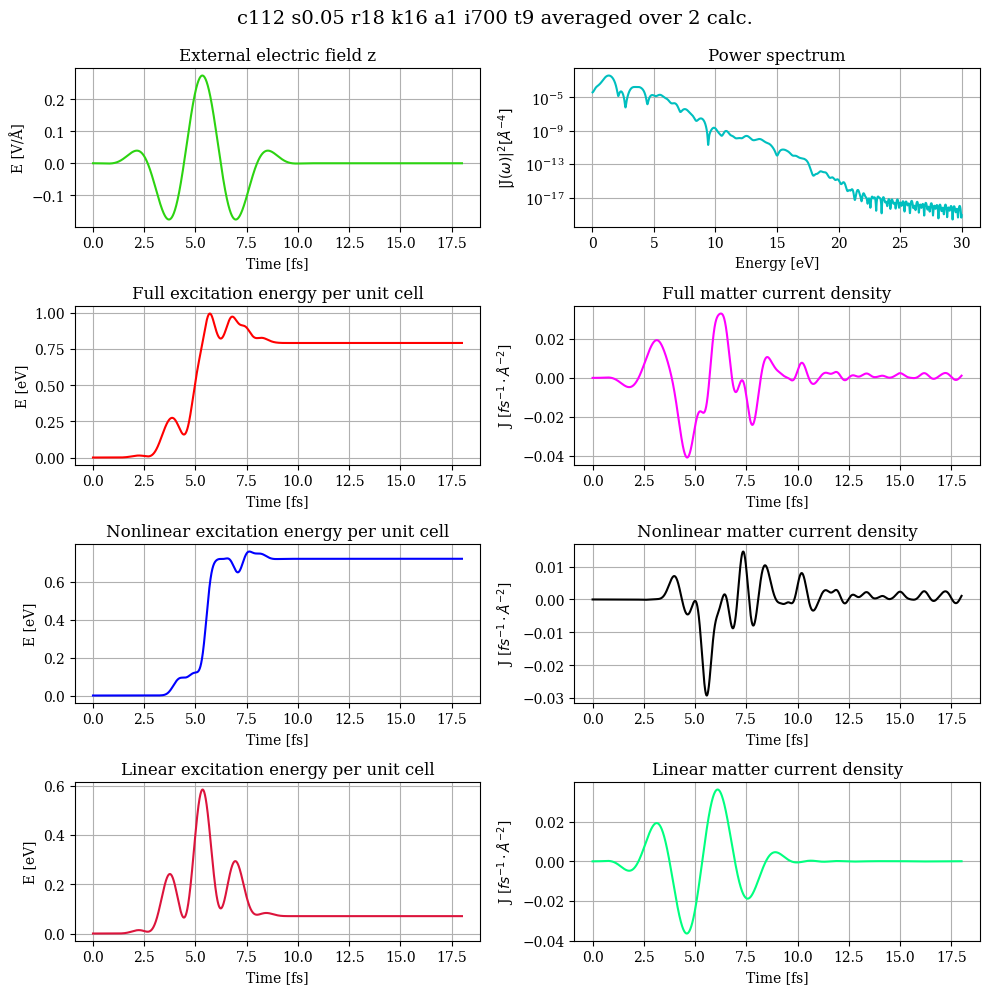

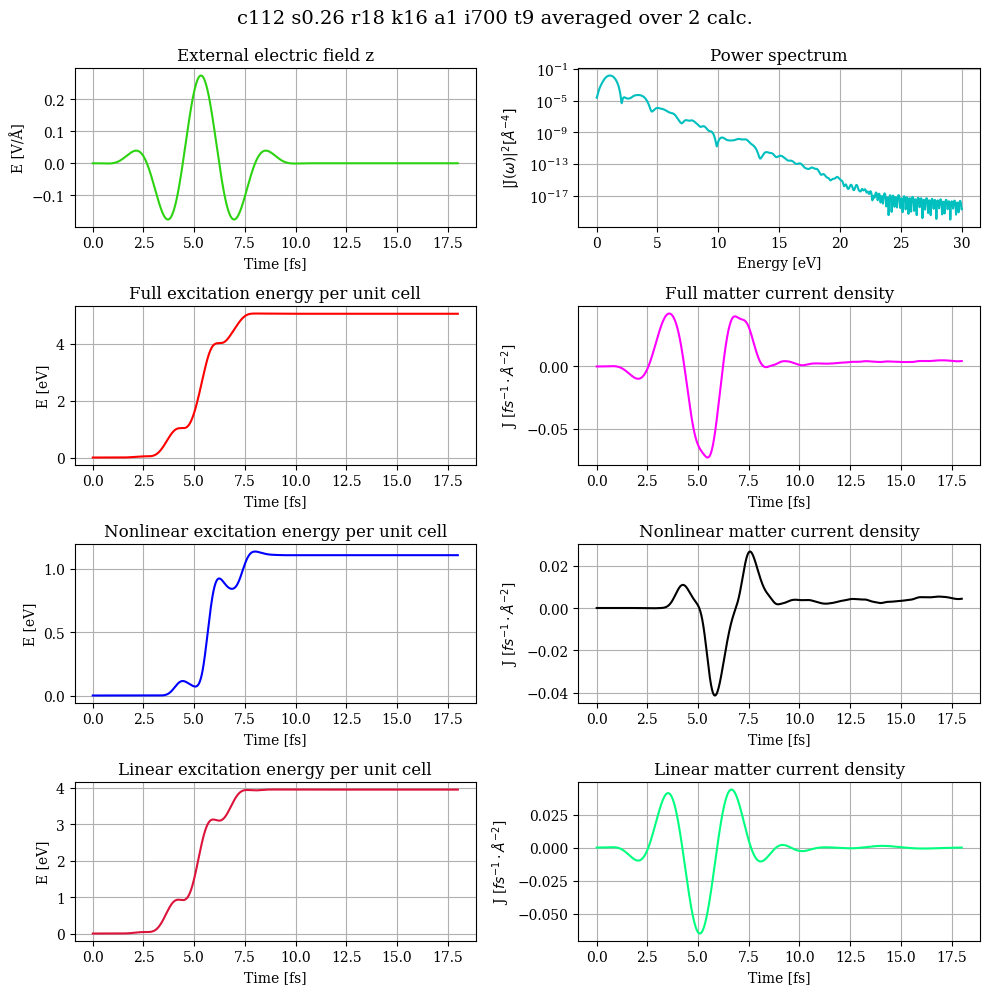

In [29]:
for key in keys:
    plot_nonlinear_response_v4_averaging(folders_dict[key], ax)

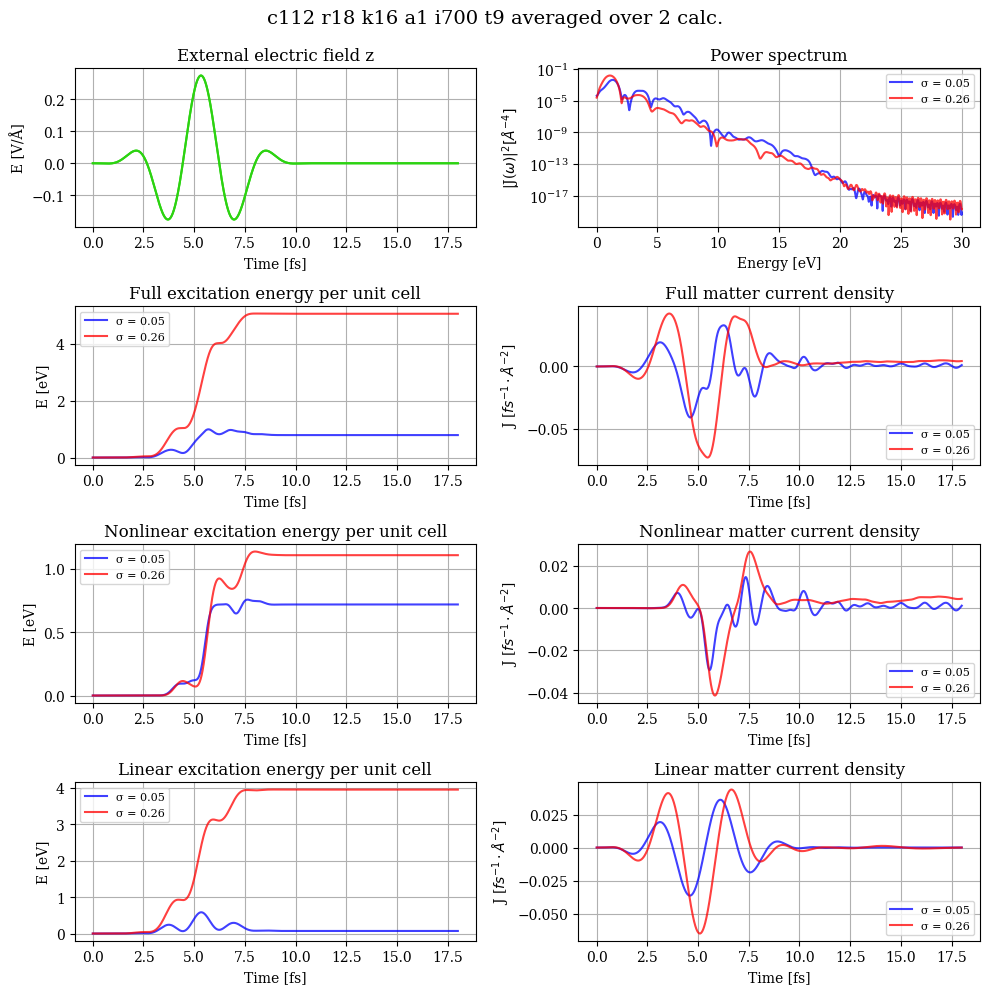

In [32]:
plot_nonlinear_response_v5_averaging_disorder(folders_dict, ax)

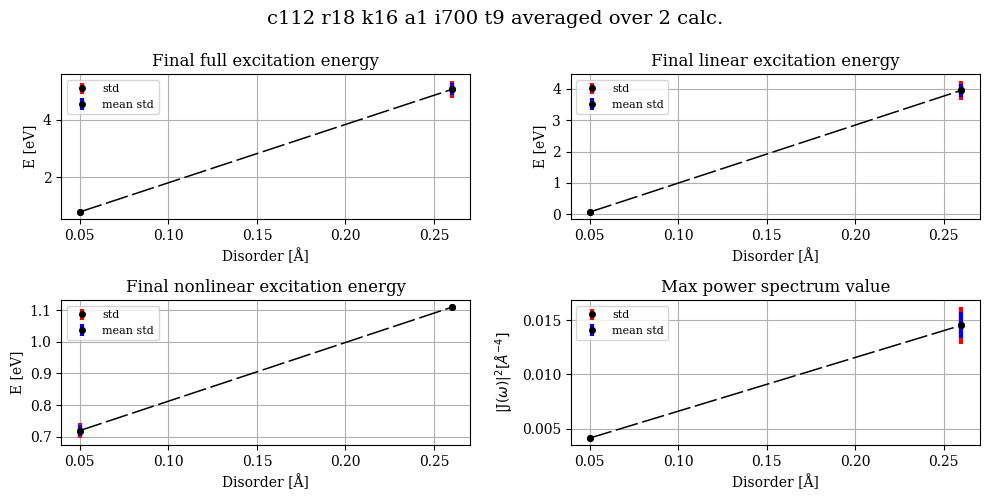

In [22]:
plot_nonlinear_response_v8_averaging_disorder_final_en(folders_dict, ax)